In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from pydicom import dcmread
from pydicom.data import get_testdata_file
from copy import deepcopy

In [2]:
df_user = pd.read_csv('../../Data/user.csv')
df_therapist = pd.read_csv('../../Data/therapists.csv')
df_exercise = pd.read_csv('../../Data/exercise.csv')
df_exercise_parameters = pd.read_csv('../../Data/exercise_parameters.csv')
df_scores_parameters = pd.read_csv('../../Data/scores.csv')
df_first_rep = pd.read_csv('../../Data/rep_data.cvs')

In [3]:
df_user

,_id,name,surname,diagnosis,sex,place of birth,birthday
0,6442464a942baa3a5d39de9f,Mario,Rossi,left hand injured,M,Roma,13/Mar/1980


In [4]:
df_therapist

,_id,username,name,surname
0,64402100534e41b746bf1009,John_Doe,John,Doe


In [5]:
df_exercise

,_id,name,description
0,6357e2c031edddaaec13e306,Keyboard,Touch the illuminated key with the illuminated...


In [6]:
df_exercise_parameters

,_id,timestamp,duration,difficulty,repetitions
0,64900ae9eec7b154096cfaf7,19-Jun-2023,10,1,1


In [7]:
df_scores_parameters

,_id,startExercise,endExercise,score
0,6490357f31603b4a9ed6c260,6/19/2023 1:01:19 PM,6/19/2023 1:01:29 PM,2


In [8]:
df_first_rep.iloc[:, 1:]

,Id,timestamp,palmPosition_x,palmPosition_y,palmPosition_z,Thumb_Tip_x,Thumb_Tip_y,Thumb_Tip_z,Thumb_Carp_x,Thumb_Carp_y,...,Pinky_Carp_z,Pinky_Mcp_x,Pinky_Mcp_y,Pinky_Mcp_z,Pinky_Pip_x,Pinky_Pip_y,Pinky_Pip_z,Pinky_Dip_x,Pinky_Dip_y,Pinky_Dip_z
0,13539,12217.838782,-0.020674,0.155242,-0.070662,-0.062601,0.179496,-0.042039,-0.022317,0.154601,...,-0.106898,-0.028978,0.128296,-0.053118,-0.038514,0.129293,-0.032918,-0.051921,0.136105,-0.027364
1,13539,12217.868610,-0.020626,0.155335,-0.070766,-0.062025,0.178633,-0.041627,-0.022401,0.154631,...,-0.106953,-0.028765,0.128365,-0.053168,-0.038213,0.129282,-0.032992,-0.051642,0.135929,-0.027440
2,13540,12217.890649,-0.020488,0.155235,-0.070890,-0.061313,0.178124,-0.041560,-0.022390,0.154415,...,-0.107008,-0.028430,0.128253,-0.053222,-0.037870,0.129155,-0.033078,-0.051338,0.135728,-0.027541
3,13541,12217.909459,-0.020408,0.154971,-0.070457,-0.061669,0.177567,-0.041319,-0.022582,0.154077,...,-0.106487,-0.028017,0.127957,-0.052676,-0.037570,0.129094,-0.032701,-0.051160,0.135692,-0.027735
4,13542,12217.929459,-0.020478,0.154926,-0.070517,-0.062216,0.177430,-0.041432,-0.022597,0.154011,...,-0.106537,-0.028135,0.127903,-0.052737,-0.037661,0.129004,-0.032717,-0.051231,0.135606,-0.027597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,13970,12227.758672,0.000427,0.158619,-0.035365,-0.015175,0.241097,-0.038008,0.004700,0.165533,...,-0.074580,-0.001840,0.127605,-0.022059,-0.004203,0.116951,0.000812,-0.009717,0.109337,0.016986
488,13971,12227.778969,0.000140,0.158729,-0.035316,-0.016112,0.241192,-0.038371,0.004398,0.165562,...,-0.074488,-0.002127,0.127733,-0.021961,-0.004646,0.117187,0.000895,-0.010239,0.109720,0.017058
489,13971,12227.802697,-0.000177,0.158895,-0.035268,-0.016802,0.241348,-0.038557,0.004071,0.165681,...,-0.074414,-0.002443,0.127909,-0.021884,-0.005052,0.117424,0.000965,-0.010693,0.110041,0.017120
490,13972,12227.823122,-0.000206,0.158926,-0.035351,-0.016911,0.241404,-0.038830,0.004032,0.165640,...,-0.074454,-0.002448,0.127955,-0.021922,-0.005132,0.117504,0.000932,-0.010835,0.110140,0.017069


In [9]:
fpath = get_testdata_file("waveform_ecg.dcm") 
ds = dcmread(fpath)
print(ds.SOPClassUID.name)


12-lead ECG Waveform Storage


In [10]:
ds.file_meta

(0002, 0000) File Meta Information Group Length  UL: 176
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: 12-lead ECG Waveform Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.20029.40.20130125105919.5407.1.1
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.76.13.1.1.1.1
(0002, 0013) Implementation Version Name         SH: 'AISDWAM40'

In [11]:
fingers = ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']
joints = ['Tip', 'Dip', 'Pip', 'Mcp']

data = []
for f in fingers:
    for j in joints:
        data.append(f+'_'+j)
data.append('Timestamp')
print(data)

['Thumb_Tip', 'Thumb_Dip', 'Thumb_Pip', 'Thumb_Mcp', 'Index_Tip', 'Index_Dip', 'Index_Pip', 'Index_Mcp', 'Middle_Tip', 'Middle_Dip', 'Middle_Pip', 'Middle_Mcp', 'Ring_Tip', 'Ring_Dip', 'Ring_Pip', 'Ring_Mcp', 'Pinky_Tip', 'Pinky_Dip', 'Pinky_Pip', 'Pinky_Mcp', 'Timestamp']


In [12]:
ds.WaveformAnnotationSequence = None
ds.AcquisitionContextSequence = None

In [13]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 176
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: 12-lead ECG Waveform Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.20029.40.20130125105919.5407.1.1
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.76.13.1.1.1.1
(0002, 0013) Implementation Version Name         SH: 'AISDWAM40'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0012) Instance Creation Date              DA: '20130125'
(0008, 0013) Instance Creation Time              TM: '095427'
(0008, 0016) SOP Class UID                       UI: 12-lead ECG Waveform Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.20029.40.20130125105919.5407.1.1
(0008, 0020

In [14]:
# List of attribute names to check and delete if present because optional
attributes_to_delete = [
    'ChannelBaseline',
    'ChannelSensitivityCorrectionFactor',
    'FilterLowFrequency',
    'FilterHighFrequency',
    'NotchFilterFrequency',
    'ChannelSensitivity',
    'ChannelSensitivityUnitsSequence',
    'CodeValue',
    'Coding Scheme Designator',
    'Coding Scheme Version' 
]
del ds.StationName
for waveform in ds.WaveformSequence:
    for channel_definition in waveform.ChannelDefinitionSequence:
        # Iterate over each attribute in our list
        for attribute in attributes_to_delete:
            # Check if the attribute exists before attempting to delete it
            if hasattr(channel_definition, attribute):
                delattr(channel_definition, attribute)


In [15]:
# Ensure ds.WaveformSequence contains at least 21 waveforms
waveforms = ds.WaveformSequence
lenght = 21
if ds.WaveformSequence:
    # Initialize waveforms with a copy of the first waveform sequence
    initial_waveform = deepcopy(ds.WaveformSequence[0])
    # Calculate the number of copies needed to reach a total of 25 waveforms
    additional_copies_needed = lenght - len(waveforms)
    # Create additional copies and extend the waveforms list in one step
    waveforms.extend(deepcopy(initial_waveform) for _ in range(additional_copies_needed))
else:
    print("Error: ds.WaveformSequence is empty.")

print(f"Total waveforms: {len(waveforms)}")


Total waveforms: 21


In [16]:
ds.file_meta.MediaStorageSOPClassUID = '1.1.111.10008.5.1.4.1.1.1.1.1' # invented for PR  (MediaStorageSOPClassUID) 
ds.file_meta.MediaStorageSOPInstanceUID = '1.1.1.1.1.1.1.1.1' # invented for PR
ds.SOPClassUID= '1.1.111.10008.5.1.4.1.1.1.1.1' # invented for PR
ds.Modality = 'Hand Rehab'
ds.Manufacturer = 'University of L\'Aquila'
ds.InstitutionName = 'Univerisity of L\'Aquila'
ds.StudyDescription = df_exercise['description'][0]
ds.InstanceCreationDate = '20240222'
ds.add_new((0x0008, 0x1080), 'LO', df_user['diagnosis'][0])
ds.StudyDate = '20240222'
ds.ContentDate = '20240222'
ds.AcquisitionDateTime = '20240222105919'
ds.remove_private_tags()
ds

/Users/alessandrodimatteo/opt/anaconda3/envs/dcmEnv_/lib/python3.9/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR CS: 'Hand Rehab'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 176
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: 1.1.111.10008.5.1.4.1.1.1.1.1
(0002, 0003) Media Storage SOP Instance UID      UI: 1.1.1.1.1.1.1.1.1
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.76.13.1.1.1.1
(0002, 0013) Implementation Version Name         SH: 'AISDWAM40'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0012) Instance Creation Date              DA: '20240222'
(0008, 0013) Instance Creation Time              TM: '095427'
(0008, 0016) SOP Class UID                       UI: 1.1.111.10008.5.1.4.1.1.1.1.1
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.20029.40.20130125105919.5407.1.1
(0008, 0020) Study Date             

In [17]:
ds.ReferringPhysicianName = df_therapist['name'][0] + df_therapist['surname'][0]

In [18]:
df_user['birthday'][0]

'13/Mar/1980'

In [19]:
ds.Manufacturer

"University of L'Aquila"

In [20]:
ds.ManufacturerModelName = 'Virtual Glove'

In [21]:
ds.PatientAge = '043Y'

In [22]:
ds.PatientName = df_user['name'][0] + ' ' +df_user['surname'][0]

original_date  = df_user['birthday'][0]
date_object = datetime.strptime(original_date, '%d/%b/%Y')
formatted_date = date_object.strftime('%Y%m%d')

ds.PatientBirthDate = formatted_date


In [23]:
df_exercise_parameters['duration']

0    10
Name: duration, dtype: int64

In [24]:
### eliminate all channels in larger quantities than 3

for i in range(len(waveforms)):
    if len(waveforms[i].ChannelDefinitionSequence) > 3:
        for it in range(3, len(waveforms[i].ChannelDefinitionSequence)):
            del waveforms[i].ChannelDefinitionSequence[3]
        
print(len(waveforms[0].ChannelDefinitionSequence))

3


In [25]:
### Deep copy of the first channels and paste to the other
while(len(waveforms[0].ChannelDefinitionSequence) < 3):
    waveforms[0].ChannelDefinitionSequence.append(deepcopy(waveforms[0].ChannelDefinitionSequence[1]))


print(len(waveforms[0].ChannelDefinitionSequence))

3


In [26]:
ds.WaveformSequence[0]

(0018, 1068) Multiplex Group Time Offset         DS: '0.0'
(0018, 1069) Trigger Time Offset                 DS: '0.0'
(003a, 0004) Waveform Originality                CS: 'ORIGINAL'
(003a, 0005) Number of Waveform Channels         US: 12
(003a, 0010) Number of Waveform Samples          UL: 10000
(003a, 001a) Sampling Frequency                  DS: '1000.0'
(003a, 0020) Multiplex Group Label               SH: 'RHYTHM'
(003a, 0200)  Channel Definition Sequence  3 item(s) ---- 
   (003a, 0208)  Channel Source Sequence  1 item(s) ---- 
      (0008, 0100) Code Value                          SH: '5.6.3-9-1'
      (0008, 0102) Coding Scheme Designator            SH: 'SCPECG'
      (0008, 0103) Coding Scheme Version               SH: '1.3'
      (0008, 0104) Code Meaning                        LO: 'Lead I (Einthoven)'
      ---------
   (003a, 0215) Channel Sample Skew                 DS: '0.0'
   (003a, 021a) Waveform Bits Stored                US: 16
   ---------
   (003a, 0208)  Channel Sou

In [27]:
def setWavesForLMC(waveforms, data, df):
    for idx, wave in enumerate(waveforms):

        for channel in wave.ChannelDefinitionSequence:
            
            channel.ChannelSensitivity = '0'
            channel.ChannelSensitivityCorrectionFactor = '0'
            channel.ChannelBaseline = '0'
            channel.FilterLowFrequency = '0'
            channel.FilterHighFrequency = '0'
            channel.NotchFilterFrequency = '0'
            

        if data[idx] == 'Timestamp':
            
            if len(wave.ChannelDefinitionSequence) >= 3:
                del wave.ChannelDefinitionSequence[1]
                del wave.ChannelDefinitionSequence[1]
               
            wave.ChannelDefinitionSequence[0].ChannelLabel = 'Timestamp'
            wave.ChannelDefinitionSequence[0].WaveformChannelNumber = 1
            wave.ChannelDefinitionSequence[0].ChannelSourceSequence[0].CodeValue = 's'
            wave.ChannelDefinitionSequence[0].ChannelSourceSequence[0].CodingSchemeDesignator = 'UCUM'
            wave.ChannelDefinitionSequence[0].ChannelSourceSequence[0].CodeMeaning = 'Timestamp'
            ch_x = df['timestamp'].astype('float64')
            arr = np.stack((ch_x), axis=-1)
            wave.WaveformData = arr.tobytes()
            wave.WaveformBitsAllocated = 64
            wave.WaveformSampleInterpretation = 'SV'
            wave["0x03a0005"].value = 1  # Number of channels
            wave.SamplingFrequency = 0
            wave.MultiplexGroupLabel = data[idx]
            wave.WaveformOriginality = 'ORIGINAL'
            wave["0x03a0010"].value = len(df)

        elif len(wave.ChannelDefinitionSequence) >= 3 :
            labels = ['x', 'y', 'z']
            for i, label in enumerate(labels):
                
                wave.ChannelDefinitionSequence[i].WaveformBitsStored = 64
                wave.ChannelDefinitionSequence[i].ChannelLabel = label
                wave.ChannelDefinitionSequence[i].WaveformChannelNumber = i
                wave.ChannelDefinitionSequence[i].ChannelSourceSequence[0].CodeValue = 'm'
                wave.ChannelDefinitionSequence[i].ChannelSourceSequence[0].CodingSchemeDesignator = 'UCUM'
                wave.ChannelDefinitionSequence[i].ChannelSourceSequence[0].CodeMeaning = label
            
            ch_x = df[data[idx]+'_x'].astype('float64')
            ch_y = df[data[idx]+'_y'].astype('float64')
            ch_z = df[data[idx]+'_z'].astype('float64')
            arr = np.stack((ch_x, ch_y, ch_z), axis=-1)
            
            wave.WaveformData = arr.tobytes()
            wave.WaveformBitsAllocated = 64
            wave.WaveformSampleInterpretation = 'SV'
            wave["0x03a0005"].value = 3  # Number of channels
            wave.SamplingFrequency = 0
            wave.MultiplexGroupLabel = data[idx]
            wave.WaveformOriginality = 'ORIGINAL'
            wave["0x03a0010"].value = len(df)  # Presuming this is a specific attribute value needed
        
    return waveforms

waveforms_rep = setWavesForLMC(waveforms,data, df_first_rep.iloc[:, 1:])

In [28]:
ds.WaveformSequence = waveforms_rep

In [29]:
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 176
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: 1.1.111.10008.5.1.4.1.1.1.1.1
(0002, 0003) Media Storage SOP Instance UID      UI: 1.1.1.1.1.1.1.1.1
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.76.13.1.1.1.1
(0002, 0013) Implementation Version Name         SH: 'AISDWAM40'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0012) Instance Creation Date              DA: '20240222'
(0008, 0013) Instance Creation Time              TM: '095427'
(0008, 0016) SOP Class UID                       UI: 1.1.111.10008.5.1.4.1.1.1.1.1
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.20029.40.20130125105919.5407.1.1
(0008, 0020) Study Date             

In [30]:
ds['SeriesNumber'].value = 1

In [31]:
### Private elements to store Exercise Parameters

# Define a private creator to reserve a block of elements
private_creator = "StudyPrivateElements"
group = 0x0011  # Private group, should be an odd number
ds.add_new((group, 0x0010 ), 'LO', private_creator)


# Private Element 1: Secret Patient ID (LO - Long String)
# Implied name: "SecretPatientID"
ds.add_new((group, 0x1001), 'IS', df_exercise_parameters['duration'][0])  
# Private Element 2: Session Number (IS - Integer String)
# Implied name: "SessionNumber"
ds.add_new((group, 0x1002), 'IS', df_exercise_parameters['difficulty'][0]) 

# Private Element 3: Custom Measurement (FD - Floating Point Double)
# Implied name: "CustomMeasurement"
ds.add_new((group, 0x1003), 'IS', df_exercise_parameters['repetitions'][0])  

In [32]:
### Private elements to store score achieved

# Define a private creator to reserve a block of elements
private_creator = "SeriesPrivateElements"
group = 0x0021  # Private group, should be an odd number
ds.add_new((group, 0x0010 ), 'LO', private_creator)


date_str_1_corrected = str(df_scores_parameters['startExercise'][0])
date_str_2_corrected = str(df_scores_parameters['endExercise'][0])


# Convert the string dates to datetime objects
date_1_corrected = datetime.strptime(date_str_1_corrected, "%m/%d/%Y %I:%M:%S %p")
date_2_corrected = datetime.strptime(date_str_2_corrected, "%m/%d/%Y %I:%M:%S %p")

# Calculate the difference between the two corrected dates
date_difference_corrected = date_1_corrected - date_2_corrected

# Extract the total difference in seconds to handle cases crossing daylight saving time changes
total_seconds_difference_corrected = date_difference_corrected.total_seconds()

ds.add_new((group, 0x1004), 'FD', total_seconds_difference_corrected)  
ds.add_new((group, 0x1005), 'IS', df_scores_parameters['score'][0]) 


In [33]:
### Sample code for debugging, the value inside has not already changed

waveformNumber = 1

multiplex = ds.WaveformSequence[waveformNumber]
print("Label: " + multiplex.MultiplexGroupLabel)
print("Sampling Frequency: " + str(multiplex.SamplingFrequency) ) # in Hz
print("Channels: "+ str(multiplex.NumberOfWaveformChannels))
print("Number of Samples: "+ str(multiplex.NumberOfWaveformSamples))


for channelDefinition in multiplex.ChannelDefinitionSequence:
    print(channelDefinition.ChannelSourceSequence[0],"\n")



Label: Thumb_Dip
Sampling Frequency: 0.0
Channels: 3
Number of Samples: 492
(0008, 0100) Code Value                          SH: 'm'
(0008, 0102) Coding Scheme Designator            SH: 'UCUM'
(0008, 0103) Coding Scheme Version               SH: '1.3'
(0008, 0104) Code Meaning                        LO: 'x' 

(0008, 0100) Code Value                          SH: 'm'
(0008, 0102) Coding Scheme Designator            SH: 'UCUM'
(0008, 0103) Coding Scheme Version               SH: '1.3'
(0008, 0104) Code Meaning                        LO: 'y' 

(0008, 0100) Code Value                          SH: 'm'
(0008, 0102) Coding Scheme Designator            SH: 'UCUM'
(0008, 0103) Coding Scheme Version               SH: '1.3'
(0008, 0104) Code Meaning                        LO: 'z' 



In [34]:
### Sample code for debugging
for idx, waveform in enumerate(ds.WaveformSequence):
    print(waveform.MultiplexGroupLabel)
    for ii, channel in enumerate(waveform.ChannelDefinitionSequence):
        source = channel.ChannelSourceSequence[0].CodeMeaning
        units = 'unitless'
        if 'ChannelSensitivity' in channel:  
            units = channel.ChannelSourceSequence[0].CodeValue
        print(f"Channel {ii + 1}: {source} ({units})")
   

Thumb_Tip
Channel 1: x (m)
Channel 2: y (m)
Channel 3: z (m)
Thumb_Dip
Channel 1: x (m)
Channel 2: y (m)
Channel 3: z (m)
Thumb_Pip
Channel 1: x (m)
Channel 2: y (m)
Channel 3: z (m)
Thumb_Mcp
Channel 1: x (m)
Channel 2: y (m)
Channel 3: z (m)
Index_Tip
Channel 1: x (m)
Channel 2: y (m)
Channel 3: z (m)
Index_Dip
Channel 1: x (m)
Channel 2: y (m)
Channel 3: z (m)
Index_Pip
Channel 1: x (m)
Channel 2: y (m)
Channel 3: z (m)
Index_Mcp
Channel 1: x (m)
Channel 2: y (m)
Channel 3: z (m)
Middle_Tip
Channel 1: x (m)
Channel 2: y (m)
Channel 3: z (m)
Middle_Dip
Channel 1: x (m)
Channel 2: y (m)
Channel 3: z (m)
Middle_Pip
Channel 1: x (m)
Channel 2: y (m)
Channel 3: z (m)
Middle_Mcp
Channel 1: x (m)
Channel 2: y (m)
Channel 3: z (m)
Ring_Tip
Channel 1: x (m)
Channel 2: y (m)
Channel 3: z (m)
Ring_Dip
Channel 1: x (m)
Channel 2: y (m)
Channel 3: z (m)
Ring_Pip
Channel 1: x (m)
Channel 2: y (m)
Channel 3: z (m)
Ring_Mcp
Channel 1: x (m)
Channel 2: y (m)
Channel 3: z (m)
Pinky_Tip
Channel 1: x (

In [35]:
### Function to extract waveform data for plotting

def read_dicom_waveforms(dicom):
    # Load the DICOM file
    ds = dicom
    # Extract and convert the waveform data for each lead
    reshaped_datas = []
    for waveform in ds.WaveformSequence:
        channels = (waveform[0x03a0010].value)
        points = waveform[(0x03a0005)].value

        lead_data_bytes = waveform.WaveformData
        num_bits = waveform.WaveformBitsAllocated
        dtype = 'float16'
        if num_bits in (8, 16, 32, 64):
            dtype_prefix = 'float'  
            dtype = f'{dtype_prefix}{num_bits}'
        else:
            raise ValueError("Unsupported number of bits. Choose from 8, 16, 32, or 64.")
        lead_data_floats = np.frombuffer(lead_data_bytes, dtype=dtype)
        reshaped_data = lead_data_floats.reshape((channels, points))

        reshaped_datas.append(reshaped_data)
    return reshaped_datas   


raw = read_dicom_waveforms(ds)

[[-0.06260129  0.17949583 -0.0420393 ]
 [-0.06202481  0.17863296 -0.04162745]
 [-0.06131285  0.17812394 -0.04155995]
 ...
 [-0.01680183  0.24134758 -0.03855712]
 [-0.01691088  0.24140371 -0.03882951]
 [-0.01709557  0.24151662 -0.03887526]]


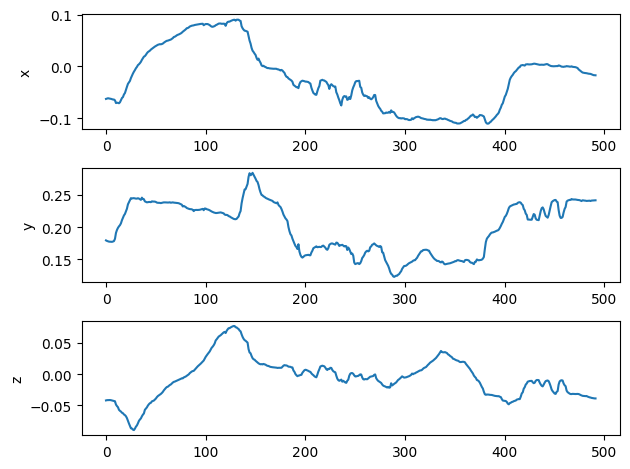

In [36]:
### Function to plot the data


def display_timeseries(columnNumber, raw, labels=None):
    if columnNumber >= len(raw):
        print(f"Error: Requested column number {columnNumber} exceeds available datasets.")
        return
    
    data = raw[columnNumber]
    
    # Determine the number of plots based on the second dimension of the data
    num_plots = data.shape[1] if len(data.shape) > 1 else 1
    
    # Set default labels if none are provided
    if labels is None:
        labels = ['x', 'y', 'z'][:num_plots] if num_plots > 1 else ['timestamp']
    
    fig, axs = plt.subplots(num_plots, 1, squeeze=False)
    
    for i in range(num_plots):
        axs[i, 0].plot(data[:, i] if num_plots > 1 else data)
        axs[i, 0].set_ylabel(labels[i])
    
    print(data)
    plt.tight_layout()
    plt.show()


display_timeseries(0, raw)

In [37]:
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 176
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: 1.1.111.10008.5.1.4.1.1.1.1.1
(0002, 0003) Media Storage SOP Instance UID      UI: 1.1.1.1.1.1.1.1.1
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.76.13.1.1.1.1
(0002, 0013) Implementation Version Name         SH: 'AISDWAM40'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0012) Instance Creation Date              DA: '20240222'
(0008, 0013) Instance Creation Time              TM: '095427'
(0008, 0016) SOP Class UID                       UI: 1.1.111.10008.5.1.4.1.1.1.1.1
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.20029.40.20130125105919.5407.1.1
(0008, 0020) Study Date             

In [38]:
ds.save_as("example.dcm")